# Análise Exploratória de Dados (EDA)

A análise exploratória de dados (EDA) é uma abordagem para analisar conjuntos de dados para resumir suas principais características, geralmente com métodos visuais.

In [293]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, mannwhitneyu

from datetime import datetime

## Parte 1 e 2 - Importação de dados e análises iniciais

In [294]:
df = pl.read_excel('data/dataset_rolling_stones.xlsx').select(
    pl.all().exclude('release_date'),
    pl.col('release_date').str.strptime(pl.Date, '%m-%d-%y')
)
df.head()

name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_date
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,date
"""Concert Intro …","""Licked Live In…",1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.11,118001.0,0.0302,33,48640,2022-06-10
"""Street Fightin…","""Licked Live In…",2,0.437,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.318,34,253173,2022-06-10
"""Start Me Up - …","""Licked Live In…",3,0.416,0.386,0.969,0.4,0.956,-4936.0,0.115,130066.0,0.313,34,263160,2022-06-10
"""If You Can't R…","""Licked Live In…",4,0.567,0.369,0.985,0.000107,0.895,-5535.0,0.193,132994.0,0.147,32,305880,2022-06-10
"""Don’t Stop - L…","""Licked Live In…",5,0.4,0.303,0.969,0.0559,0.966,-5098.0,0.093,130533.0,0.206,32,305106,2022-06-10


In [295]:
df.shape

(1610, 15)

In [296]:
data_inicial = df.select(pl.min('release_date')).row(0)[0]
print (f'Data Inicial {data_inicial.strftime("%d/%m/%Y")}')

Data Inicial 16/04/1964


In [297]:
data_final = df.select(pl.max('release_date')).row(0)[0]
print (f'Data Final {data_final.strftime("%d/%m/%Y")}')

Data Final 10/06/2022


Uma das primeiras coisas que devemos fazer após verificar os tipos dos dados e o shape do dataframe é verificar se existem dados nulos

In [298]:
pl.DataFrame({'Colunas': df.columns, 'N Nulls': df.null_count().transpose().to_series()})

Colunas,N Nulls
str,u32
"""name""",0
"""album""",0
"""track_number""",0
"""acousticness""",0
"""danceability""",0
"""energy""",0
"""instrumentalne…",0
"""liveness""",0
"""loudness""",0


Outra coisa importante é verificar se existem dados duplicados

In [299]:
print(f"Existem {df.is_duplicated().sum()} registros duplicados")

Existem 12 registros duplicados


In [300]:
df.filter(df.is_duplicated()).sort('name')

name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_date
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,date
"""Claudine""","""Some Girls (De…",1,0.0144,0.439,0.977,0.0221,0.383,-4386.0,0.128,105124.0,0.364,17,222253,1978-06-09
"""Claudine""","""Some Girls (De…",1,0.0144,0.439,0.977,0.0221,0.383,-4386.0,0.128,105124.0,0.364,17,222253,1978-06-09
"""Don't Be A Str…","""Some Girls (De…",6,0.061,0.72,0.867,0.0297,0.385,-5871.0,0.039,127329.0,0.847,15,246266,1978-06-09
"""Don't Be A Str…","""Some Girls (De…",6,0.061,0.72,0.867,0.0297,0.385,-5871.0,0.039,127329.0,0.847,15,246266,1978-06-09
"""Lies - Remaste…","""Some Girls (De…",5,0.437,0.382,0.997,0.95,0.617,-1568.0,0.188,162428.0,0.563,16,191266,1978-06-09
"""Lies - Remaste…","""Some Girls (De…",5,0.437,0.382,0.997,0.95,0.617,-1568.0,0.188,162428.0,0.563,16,191266,1978-06-09
"""No Spare Parts…","""Some Girls (De…",5,0.24,0.594,0.762,0.0000152,0.712,-5145.0,0.0292,72648.0,0.54,19,270466,1978-06-09
"""No Spare Parts…","""Some Girls (De…",5,0.24,0.594,0.762,0.0000152,0.712,-5145.0,0.0292,72648.0,0.54,19,270466,1978-06-09
"""Petrol Blues""","""Some Girls (De…",12,0.769,0.835,0.621,0.114,0.116,-8007.0,0.0406,115.87,0.336,13,95626,1978-06-09


Após verificar que são realmente dados duplicados, podemos excluí-los

In [301]:
df = df.unique()
df.shape

(1604, 15)

## Parte 3, 4 e 5 - Análise exploratória e visualização de dados

Para entendermos melhor os dados, podemos utilizar o método describe() para verificar algumas estatísticas básicas dos dados

In [302]:
df.describe()

describe,name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_date
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""","""1604""","""1604""",1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,"""1604"""
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",null,null,8.625312,0.250135,0.468466,0.792098,0.163764,0.492003,-6413.385611,0.069452,114169.019825,0.582376,20.802993,257888.36409,null
"""std""",null,null,6.566604,0.227175,0.141553,0.179992,0.275848,0.349515,3476.641891,0.051599,46154.202354,0.231434,12.446711,108442.141003,null
"""min""","""(I Can't Get N…","""12 X 5""",1.0,0.000009,0.104,0.141,0.0,0.0219,-24408.0,0.0232,65.99,0.0,0.0,21000.0,"""1964-04-16"""
"""25%""",null,null,4.0,0.0583,0.362,0.674,0.000219,0.153,-8851.0,0.0365,99014.0,0.405,13.0,190613.0,null
"""50%""",null,null,7.0,0.183,0.458,0.848,0.0136,0.379,-6179.0,0.0512,120347.0,0.584,20.0,243133.0,null
"""75%""",null,null,11.0,0.403,0.578,0.945,0.179,0.895,-4254.0,0.0866,140934.0,0.779,27.0,296120.0,null
"""max""","""You’re Gonna M…","""got LIVE if yo…",47.0,0.994,0.887,0.999,0.996,0.998,-2.31,0.624,216304.0,0.974,80.0,981866.0,"""2022-06-10"""


Vamos transformar a coluna duration_ms para minutos

In [303]:
df = df.with_columns(
    (pl.col('duration_ms')/60000).alias('duration_min')
)

df.head()

name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_date,duration_min
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,date,f64
"""Concert Intro …","""Licked Live In…",1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.11,118001.0,0.0302,33,48640,2022-06-10,0.810667
"""Start Me Up - …","""Licked Live In…",3,0.416,0.386,0.969,0.4,0.956,-4936.0,0.115,130066.0,0.313,34,263160,2022-06-10,4.386
"""If You Can't R…","""Licked Live In…",4,0.567,0.369,0.985,0.000107,0.895,-5535.0,0.193,132994.0,0.147,32,305880,2022-06-10,5.098
"""You Got Me Roc…","""Licked Live In…",15,0.32,0.388,0.974,0.0955,0.966,-4982.0,0.0974,128486.0,0.166,26,227546,2022-06-10,3.792433
"""When The Whip …","""Licked Live In…",20,0.336,0.292,0.986,0.282,0.975,-5827.0,0.131,149383.0,0.179,24,291093,2022-06-10,4.85155


In [304]:
df.describe()

describe,name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_date,duration_min
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""","""1604""","""1604""",1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,1604.0,"""1604""",1604.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,null,8.625312,0.250135,0.468466,0.792098,0.163764,0.492003,-6413.385611,0.069452,114169.019825,0.582376,20.802993,257888.36409,null,4.298139
"""std""",null,null,6.566604,0.227175,0.141553,0.179992,0.275848,0.349515,3476.641891,0.051599,46154.202354,0.231434,12.446711,108442.141003,null,1.807369
"""min""","""(I Can't Get N…","""12 X 5""",1.0,0.000009,0.104,0.141,0.0,0.0219,-24408.0,0.0232,65.99,0.0,0.0,21000.0,"""1964-04-16""",0.35
"""25%""",null,null,4.0,0.0583,0.362,0.674,0.000219,0.153,-8851.0,0.0365,99014.0,0.405,13.0,190613.0,null,3.176883
"""50%""",null,null,7.0,0.183,0.458,0.848,0.0136,0.379,-6179.0,0.0512,120347.0,0.584,20.0,243133.0,null,4.052217
"""75%""",null,null,11.0,0.403,0.578,0.945,0.179,0.895,-4254.0,0.0866,140934.0,0.779,27.0,296120.0,null,4.935333
"""max""","""You’re Gonna M…","""got LIVE if yo…",47.0,0.994,0.887,0.999,0.996,0.998,-2.31,0.624,216304.0,0.974,80.0,981866.0,"""2022-06-10""",16.364433


Podemos ver a média de duração das músicas por album

In [305]:
df.group_by('album').agg(pl.col('duration_min').mean()).sort('duration_min', descending=True)

album,duration_min
str,f64
"""Havana Moon (L…",6.632819
"""Bridges To Bre…",6.332265
"""Jamming With E…",6.042794
"""Live At The Ch…",6.009647
"""Totally Stripp…",5.94743
"""Bridges To Bue…",5.722842
"""Totally Stripp…",5.635596
"""Licked Live In…",5.61183
"""Steel Wheels L…",5.598142


Podemos visualizar o Top 5 Albuns em relação da duração das músicas através de um gráfico de barras

Text(0.5, 1.0, 'Duração Média das Músicas por Album - Top 5')

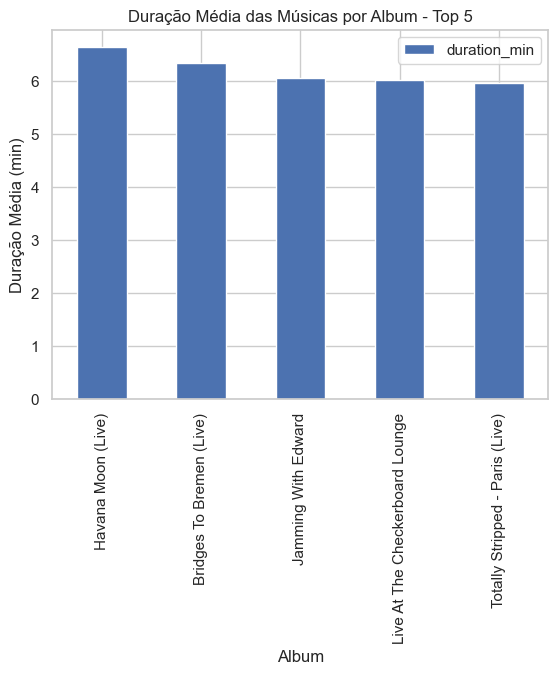

In [306]:
df_aux = df.group_by('album').agg(pl.col('duration_min').mean()).sort('duration_min', descending=True).head()

df_aux.to_pandas().plot(kind='bar', x='album', y='duration_min')
plt.xlabel('Album')
plt.ylabel('Duração Média (min)')
plt.title('Duração Média das Músicas por Album - Top 5')


Podemos visualizar os albuns com mais músicas através de um gráfico de barras horizontal

Text(0.5, 1.0, 'Número de Albuns com mais Músicas - Top 10')

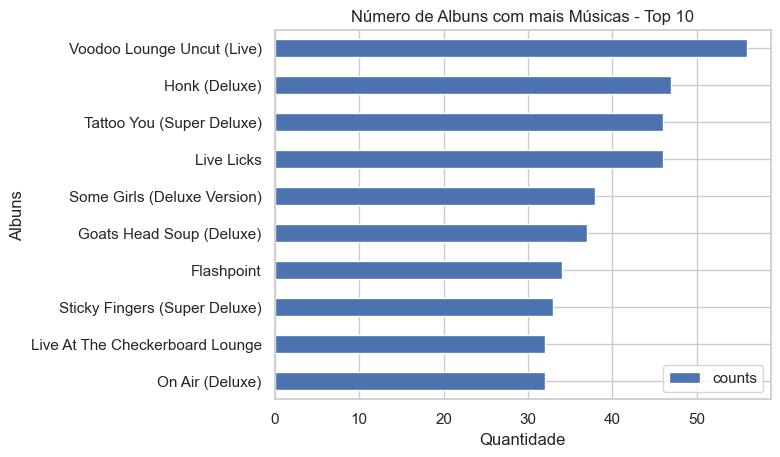

In [307]:
df_aux = (
    df.select(
        pl.col('album')
    )
    .to_series()
    .value_counts()
    .sort('counts', descending=True)
    .head(10)
    .sort('counts', descending=False)
)

df_aux.to_pandas().plot(kind='barh', x='album', y='counts')
plt.xlabel('Quantidade')
plt.ylabel('Albuns')
plt.title('Número de Albuns com mais Músicas - Top 10')

Vamos analisar o estilo musical dos albuns

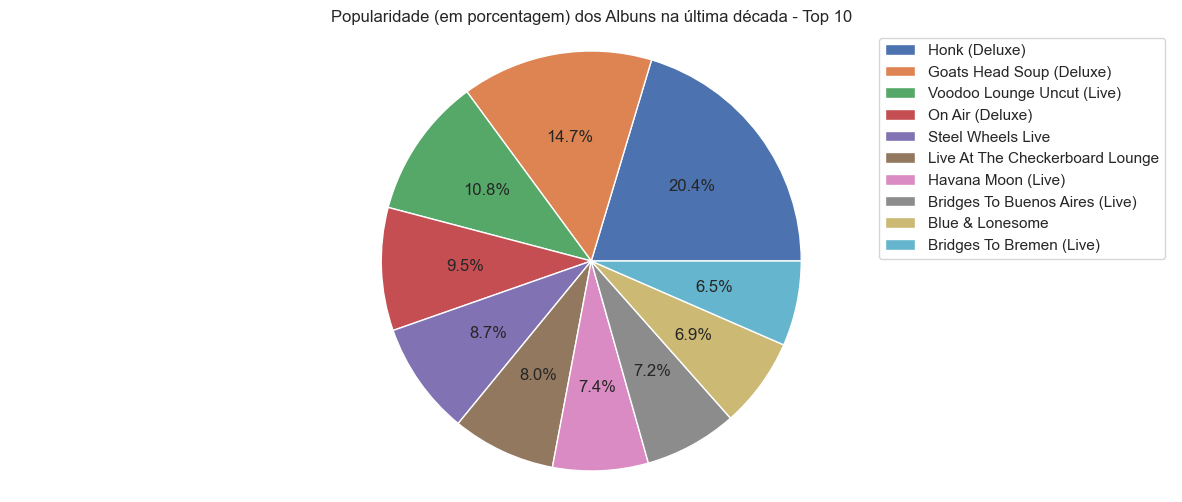

In [308]:
df_aux = (
    df.filter(
        pl.col('release_date').is_between(
            datetime(2011, 1, 1), datetime(2020, 12, 31)
        )
    )
    .group_by('album')
    .agg(pl.col('popularity').sum())
    .sort('popularity', descending=True)
    .head(10)
    .with_columns(
        (pl.col('popularity') / pl.col('popularity').sum() * 100).round(2).alias('popularity_perc')
    )
)

fig, graph = plt.subplots(figsize=(15, 6))

graph.pie(
    df_aux.to_pandas()['popularity_perc'],
    autopct='%1.1f%%'
)

graph.axis('equal')

plt.title('Popularidade (em porcentagem) dos Albuns na última década - Top 10')
plt.legend(df_aux.to_pandas()['album'], loc='best')
plt.show()

Text(0.5, 1.0, 'Duração Média das Músicas por Album - Top 5')

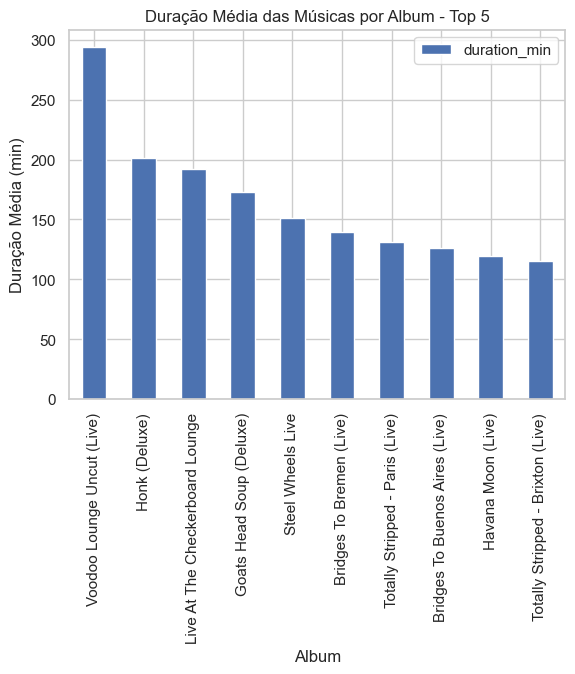

In [311]:
df_aux = (
    df.filter(
        pl.col('release_date').is_between(
            datetime(2011, 1, 1), datetime(2020, 12, 31)
        )
    )
    .group_by('album')
    .agg(pl.col('duration_min').sum())
    .sort('duration_min', descending=True)
    .head(10)
)

df_aux.to_pandas().plot(kind='bar', x='album', y='duration_min')
plt.xlabel('Album')
plt.ylabel('Duração Média (min)')
plt.title('Duração Média das Músicas por Album - Top 5')


## Parte 6 - Análise de Outliers

Outliers são dados que fogem do padrão, ou seja, são dados que estão muito distantes dos demais. Podemos identificar os outliers através de um boxplot

In [ ]:
sns.set(style="whitegrid")

O Boxplot é um gráfico que nos mostra a distribuição dos dados através de quartis. Os quartis são os valores que dividem os dados em quatro partes iguais. O primeiro quartil (Q1) é o valor que divide os dados em 25% e 75%, o segundo quartil (Q2) é o valor que divide os dados em 50% e 50% e o terceiro quartil (Q3) é o valor que divide os dados em 75% e 25%.

O boxplot é composto por uma caixa e dois bigodes. A caixa é composta pelo primeiro quartil (Q1), segundo quartil (Q2) e terceiro quartil (Q3). O bigode superior é o valor do terceiro quartil (Q3) mais 1,5 vezes o intervalo interquartil (IIQ) e o bigode inferior é o valor do primeiro quartil (Q1) menos 1,5 vezes o intervalo interquartil (IIQ).

O intervalo interquartil (IIQ) é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1). Os dados que estão fora do intervalo do bigode superior e inferior são considerados outliers.

Text(0.5, 1.0, 'Duração das Músicas - Boxplot')

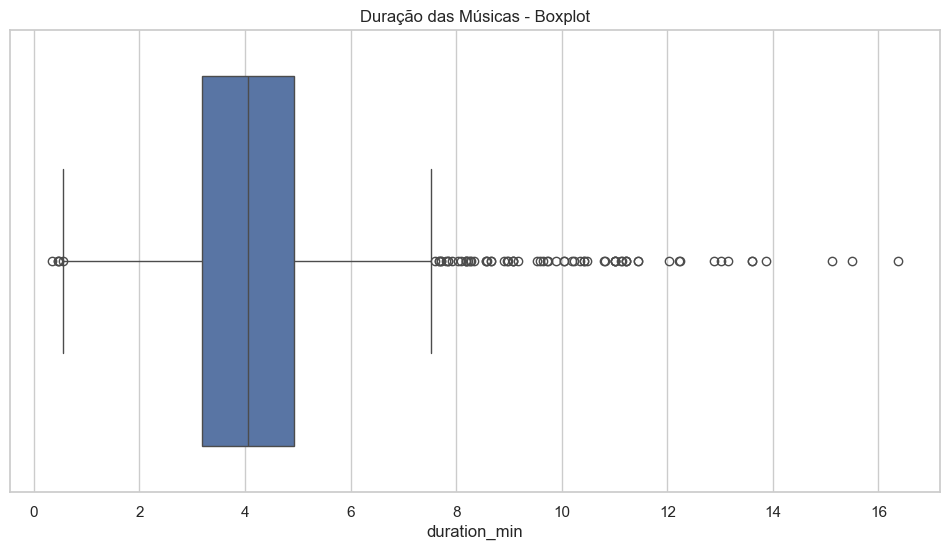

In [ ]:
fig, axes = plt.subplots(figsize=(12, 6))

sns.boxplot(
    x='duration_min', 
    data=df,
    ax=axes
)

axes.set_title('Duração das Músicas - Boxplot')

Outro gráfico útil na detecção de outliers é o gráfico de violino. O gráfico de violino é uma combinação de um boxplot e um gráfico de densidade. O gráfico de violino nos mostra a distribuição dos dados através de uma função de densidade de probabilidade.

Text(0.5, 1.0, 'Duração das Músicas - Violinplot')

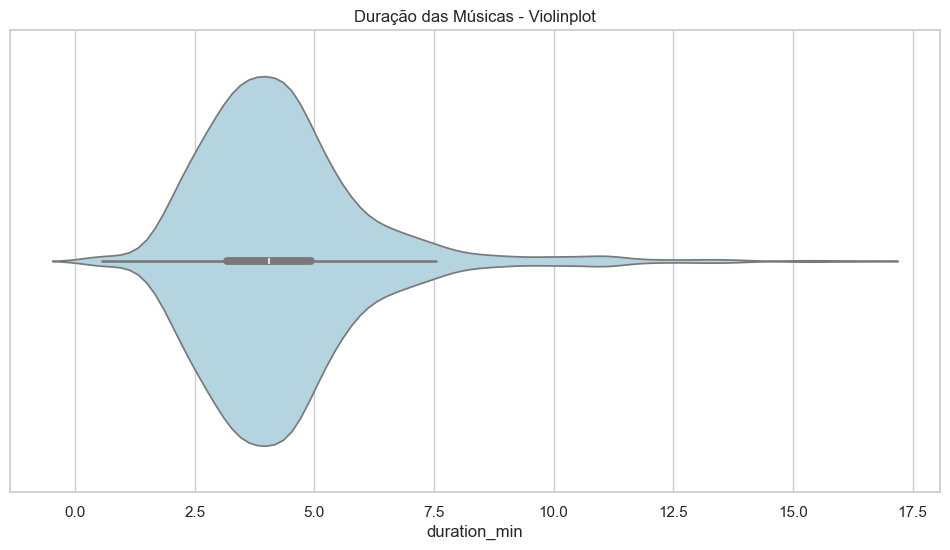

In [ ]:
fig, axes = plt.subplots(figsize=(12, 6))

sns.violinplot(
    x='duration_min', 
    data=df,
    color='lightblue',
    ax=axes
)

axes.set_title('Duração das Músicas - Violinplot')

Podemos juntar os dois gráficos para facilitar a visualização dos outliers

Text(0.5, 1.0, 'Duração das Músicas - Violinplot + Boxplot')

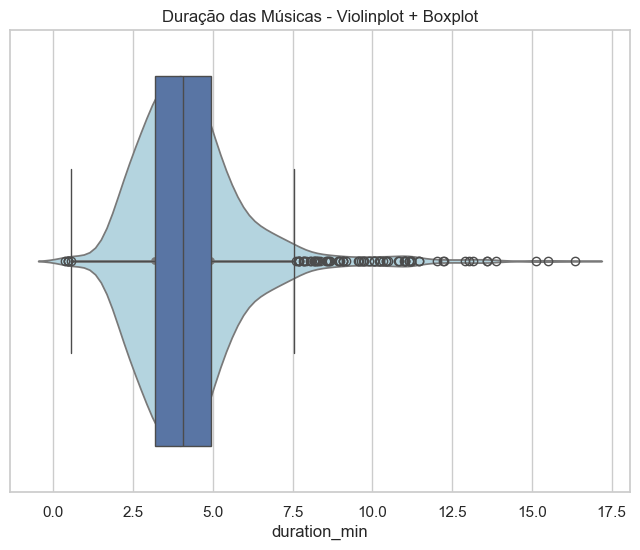

In [ ]:
fig, axes = plt.subplots(figsize=(8, 6))

sns.violinplot(
    x='duration_min', 
    data=df,
    color='lightblue',
    ax=axes
)

sns.boxplot(
    x='duration_min', 
    data=df,
    whis=1.5,
    ax=axes
)

axes.set_title('Duração das Músicas - Violinplot + Boxplot')

## Parte 7 e 8 - Distribuição dos dados

Queremos analisar o número de músicas ao vivo. Para isso temos a coluna `liveness` que nos diz a probabilidade da música ser ao vivo (valor acima de 0,8 demonstra uma alta probabilidade).

Vamos criar uma nova coluna chamada `live` que vai receber o valor True se a música for ao vivo e False se não for

In [ ]:
df = df.with_columns(
    pl.when(pl.col('liveness') >= 0.8).then(True).otherwise(False).alias('live')
)

Vamos agrupar os dados por `live` e ver quantas músicas são ao vivo e quantas não são

In [ ]:
(
    df.group_by('live')
    .agg(
        pl.col('name').count()
    )
    .with_columns(
        (pl.col('name') / pl.col('name').sum() * 100)
        .round(2)
        .alias('perc')
    )
)

live,name,perc
bool,u32,f64
true,498,31.05
false,1106,68.95


In [ ]:
df_aux = (
    df.filter(
        pl.col('live')
    )
    .select(
        pl.col('duration_min').mean()
    )
)

print(f"Média da duraçãos das músicas ao vivo: {df_aux.row(0)[0]:.2f} minutos")

df_aux = (
    df.filter(
        pl.col('live').not_()
    )
    .select(
        pl.col('duration_min').mean()
    )
)

print(f"Média da duraçãos das músicas em estúdio: {df_aux.row(0)[0]:.2f} minutos")

Média da duraçãos das músicas ao vivo: 5.09 minutos
Média da duraçãos das músicas em estúdio: 3.94 minutos


Uma forma para entendermos mais os nossos dados é visualizar a distribuição dos dados através de um histograma. O histograma é um gráfico de barras que nos mostra a frequência dos dados.

Text(0, 0.5, 'Frequência')

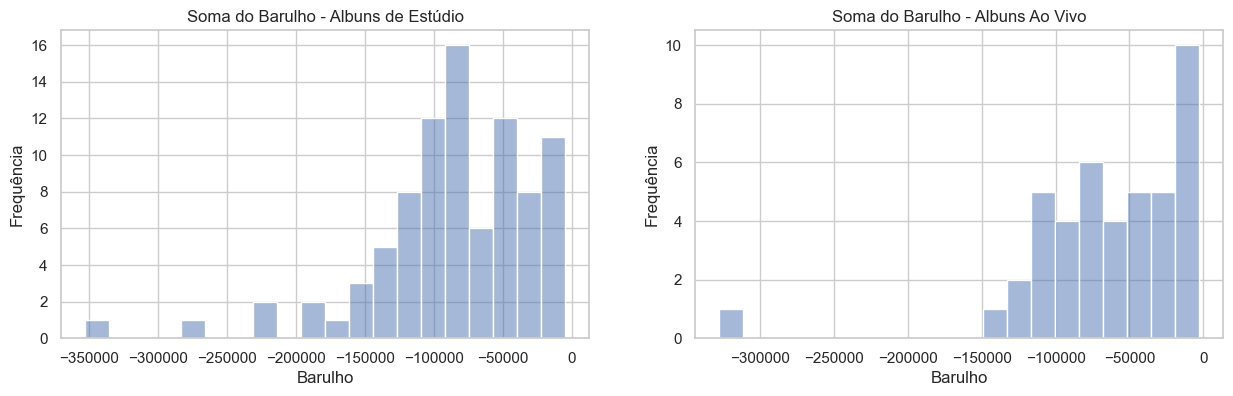

In [ ]:
df_aux_studio = (
    df.filter(
        pl.col('live').not_()
    )
    .group_by('album')
    .agg(pl.col('loudness').sum())
)

df_aux_live = (
    df.filter(
        pl.col('live')
    )
    .group_by('album')
    .agg(pl.col('loudness').sum())
)

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(
    data=df_aux_studio,
    legend=False,
    bins=20,
    ax=ax[0]
)

ax[0].set_title('Soma do Barulho - Albuns de Estúdio')
ax[0].set_xlabel('Barulho')
ax[0].set_ylabel('Frequência')

sns.histplot(
    data=df_aux_live,
    legend=False,
    bins=20,
    ax=ax[1]
)

ax[1].set_title('Soma do Barulho - Albuns Ao Vivo')
ax[1].set_xlabel('Barulho')
ax[1].set_ylabel('Frequência')


Podemos usar também um gráfico de densidade para visualizar a distribuição dos dados

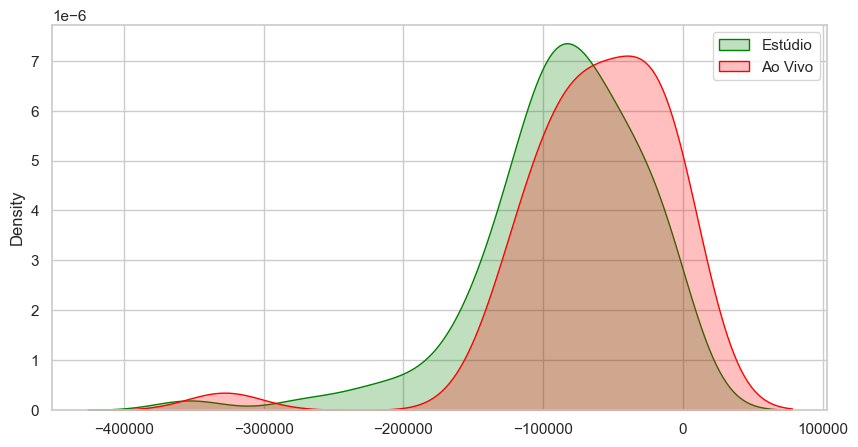

In [ ]:
df_aux_studio = (
    df.filter(
        pl.col('live').not_()
    )
    .group_by('album')
    .agg(pl.col('loudness').sum())
)

df_aux_live = (
    df.filter(
        pl.col('live')
    )
    .group_by('album')
    .agg(pl.col('loudness').sum())
)

plt.figure(figsize=(10, 5))

sns.kdeplot(
    data=df_aux_studio.to_series(1),
    label='Estúdio',
    color='green',
    fill=True
)

sns.kdeplot(
    data=df_aux_live.to_series(1),
    color='red',
    label='Ao Vivo',
    fill=True
)

plt.legend()
plt.show()


## Parte 9 e 10 - Testes estatísticos

Podemos realizar um teste de normalidade para verificar se os dados seguem uma distribuição normal. Para isso vamos utilizar o teste de Shapiro-Wilk.

O teste de Shapiro-Wilk é um teste de normalidade que nos diz se os dados seguem uma distribuição normal ou não. A hipótese nula (H0) é que os dados seguem uma distribuição normal e a hipótese alternativa (H1) é que os dados não seguem uma distribuição normal.

In [ ]:
stats, p = shapiro(df_aux_studio.to_series(1))
print(f"Albúm de Estúdio\nEstatística de teste: {stats:.4f}\np-value: {p:.6f}\n{'Normal' if p > 0.05 else 'Não Normal'}")

stats, p = shapiro(df_aux_live.to_series(1))
print(f"\nAlbúm ao Vivo\nEstatística de teste: {stats:.4f}\np-value: {p:.6f}\n{'Normal' if p > 0.05 else 'Não Normal'}")

Albúm de Estúdio
Estatística de teste: 0.8944
p-value: 0.000003
Não Normal

Albúm ao Vivo
Estatística de teste: 0.7913
p-value: 0.000002
Não Normal


Como podemos ver, o p-valor é menor que 0,05, então rejeitamos a hipótese nula (H0) e concluímos que os dados não seguem uma distribuição normal.

Outro teste que podemos fazer é se as distribuições dos dados são iguais. Para isso vamos utilizar o **teste de Mann-Whitney**. O teste de Mann-Whitney é um teste não paramétrico que nos diz se as distribuições dos dados são iguais ou não. A hipótese nula (H0) é que as distribuições dos dados são iguais e a hipótese alternativa (H1) é que as distribuições dos dados não são iguais.

In [ ]:
stats, p = mannwhitneyu(
    df_aux_studio.to_series(1),
    df_aux_live.to_series(1),
    alternative='two-sided'
)

print(f"Teste de Mann-Whitney\nEstatística de teste U: {stats:.4f}\np-value: {p:.6f}\n{'Distribuições são iguais' if p > 0.05 else 'Distribuições são diferentes'}")


Teste de Mann-Whitney
Estatística de teste U: 1367.0000
p-value: 0.010145
Distribuições são diferentes


In [ ]:
df_aux_live.shape

(43, 2)

## Parte 11 - Correlação

Uma outra análise que precisamos fazer em nossos dados é a correlação.

A correlação é uma medida estatística que nos diz se existe uma relação entre duas variáveis. A correlação varia de -1 a 1. Quando a correlação é 1, significa que existe uma correlação positiva perfeita entre as variáveis, ou seja, quando uma variável aumenta a outra também aumenta. Quando a correlação é -1, significa que existe uma correlação negativa perfeita entre as variáveis, ou seja, quando uma variável aumenta a outra diminui. Quando a correlação é 0, significa que não existe uma correlação entre as variáveis.

In [ ]:
(
    df.group_by('album')
    .agg(
        pl.col('valence').mean().alias('valence_mean'),
    )
    .with_columns(
        pl.when(pl.col('valence_mean') >= 0.6)
            .then(pl.lit('positivo'))
            .otherwise(pl.lit('negativo'))
        .alias('sentimento')
    )
    .group_by('sentimento').count()
)

sentimento,count
str,u32
"""positivo""",52
"""negativo""",38


Vamos adicionar essa informação no nosso dataframe original

In [257]:
df_aux = (
    df.group_by('album')
    .agg(
        pl.col('valence').mean().alias('valence_mean'),
    )
    .with_columns(
        pl.when(pl.col('valence_mean') >= 0.6)
            .then(pl.lit('positivo'))
            .otherwise(pl.lit('negativo'))
        .alias('sentimento')
    )
)

df = df.join(df_aux, on='album')
df.head()

name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_date,duration_min,valence_mean,sentimento
str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,date,f64,f64,str
"""You Got Me Roc…","""Licked Live In…",15,0.32,0.388,0.974,0.0955,0.966,-4982.0,0.0974,128486.0,0.166,26,227546,2022-06-10,3.792433,0.27117,"""negativo"""
"""All Down The L…","""Live At The El…",2,0.107,0.245,0.965,0.0547,0.95,-5153.0,0.0828,157346.0,0.697,29,252640,2022-05-13,4.210667,0.734826,"""positivo"""
"""Hand Of Fate -…","""Live At The El…",3,0.0654,0.477,0.899,0.0376,0.727,-6189.0,0.0425,129991.0,0.805,29,267866,2022-05-13,4.464433,0.734826,"""positivo"""
"""Route 66 - Liv…","""Live At The El…",4,0.0975,0.473,0.923,0.00157,0.722,-6204.0,0.0791,144625.0,0.792,30,193653,2022-05-13,3.22755,0.734826,"""positivo"""
"""Hot Stuff - Li…","""Live At The El…",12,0.0372,0.497,0.914,0.181,0.753,-6.82,0.0487,110005.0,0.791,27,328613,2022-05-13,5.476883,0.734826,"""positivo"""


Vamos agora calcular a correlação e observar as correlações da coluna `valence_mean`

In [274]:
df_aux = df.select(
    pl.all().exclude([pl.Utf8, pl.Date])
)

df_aux = df_aux.corr().insert_at_idx(0, pl.Series("colunas", df_aux.columns))

In [275]:
df_aux.select(pl.col(['colunas','valence_mean']))

colunas,valence_mean
str,f64
"""track_number""",-0.115135
"""acousticness""",0.01551
"""danceability""",0.494424
"""energy""",-0.346752
"""instrumentalne…",0.133042
"""liveness""",-0.573451
"""loudness""",-0.227714
"""speechiness""",-0.417293
"""tempo""",-0.027073


Podemos visualizar a correlação através de um mapa de calor

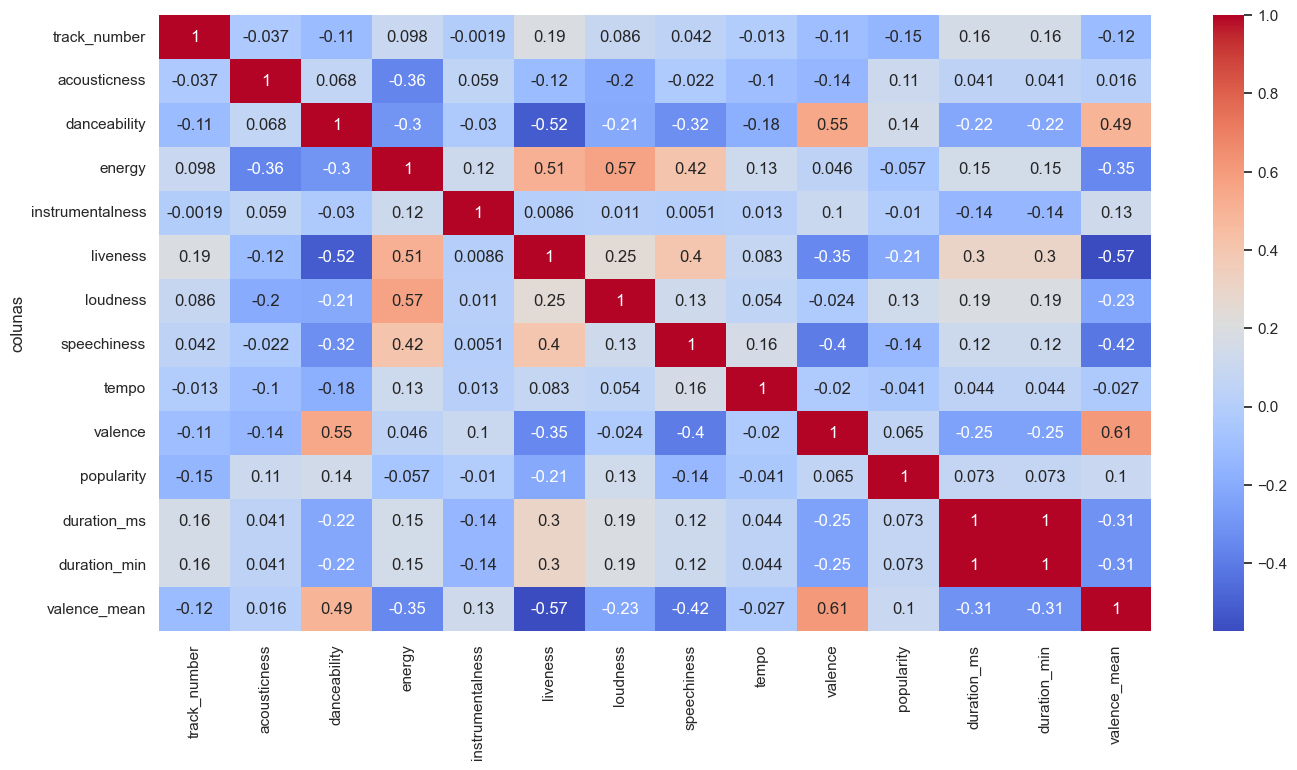

In [276]:
plt.figure(figsize=(16, 8))
sns.heatmap(
    df_aux.to_pandas().set_index('colunas'),
    annot=True,
    cmap='coolwarm'
);

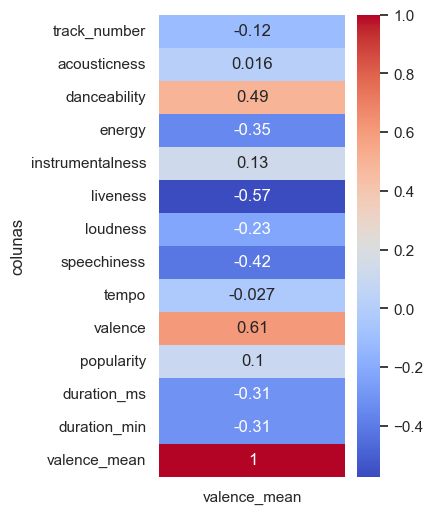

In [277]:
plt.figure(figsize=(3, 6))
sns.heatmap(
    df_aux.to_pandas().set_index('colunas')['valence_mean'].to_frame(),
    annot=True,
    cmap='coolwarm'
);

Para visualizar a correlação entre as variáveis, podemos utilizar um gráfico de dispersão. O gráfico de dispersão é um gráfico que nos mostra a relação entre duas variáveis. O gráfico de dispersão é composto por pontos que representam os dados. O eixo x representa uma variável e o eixo y representa outra variável.

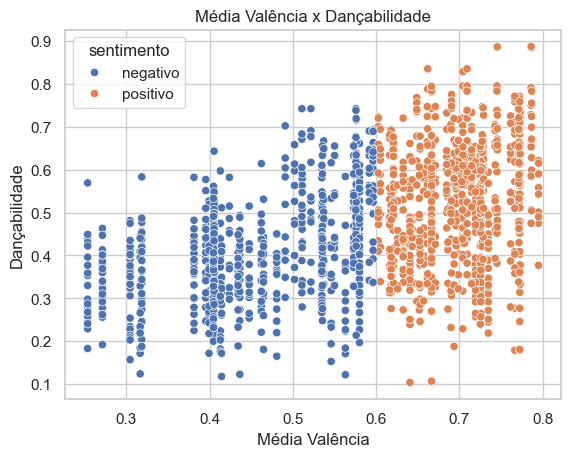

In [286]:
sns.scatterplot(
    data=df,
    x='valence_mean',
    y='danceability',
    hue='sentimento'
)

plt.title('Média Valência x Dançabilidade')
plt.xlabel('Média Valência')
plt.ylabel('Dançabilidade')

plt.show()

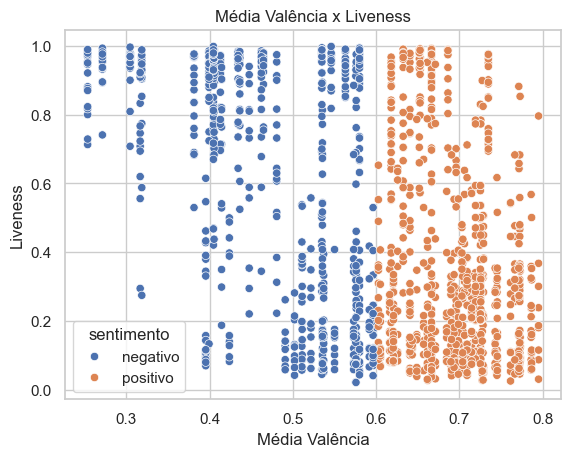

In [289]:
sns.scatterplot(
    data=df,
    x='valence_mean',
    y='liveness',
    hue='sentimento'
)

plt.title('Média Valência x Liveness')
plt.xlabel('Média Valência')
plt.ylabel('Liveness')

plt.show()